In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D , MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_train.dtype

dtype('uint8')

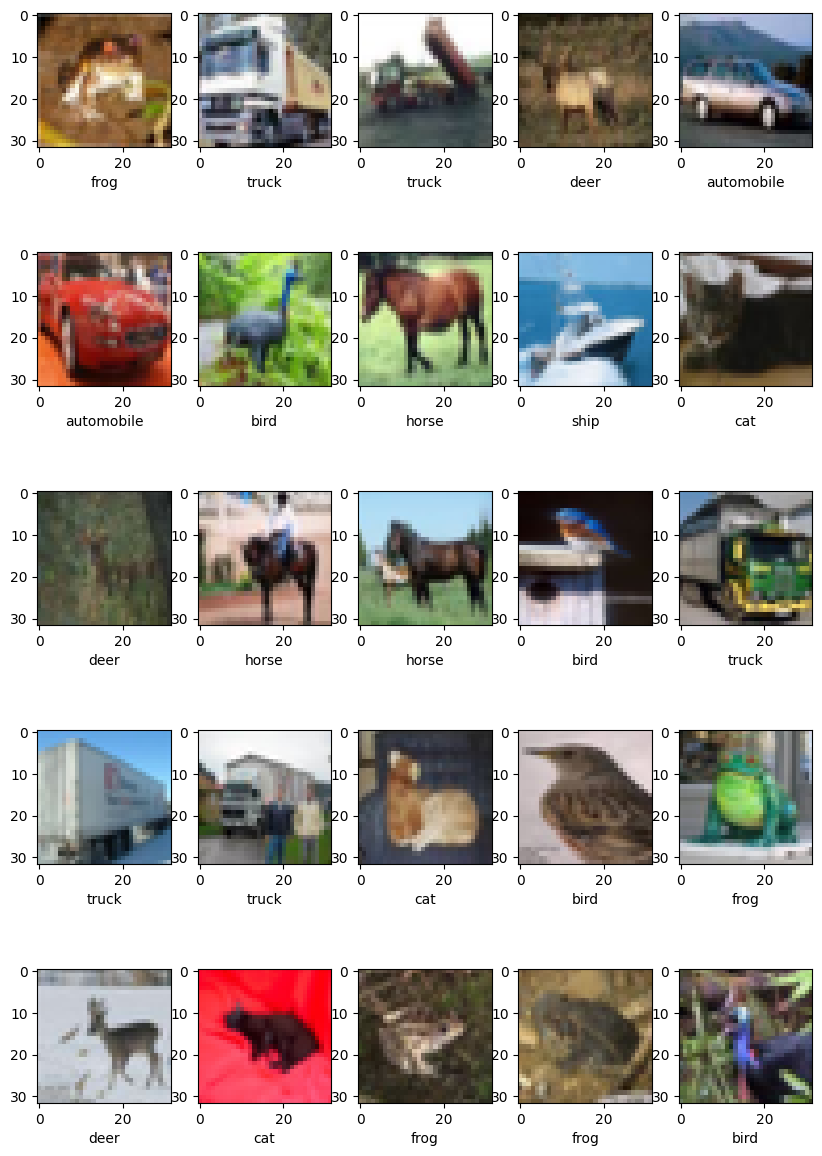

In [8]:
import matplotlib.pyplot as plt
classesName = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(classesName[y_train[i][0]])
plt.show()

In [9]:
y_train = y_train.flatten()
y_train.shape
y_train


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [59]:
import seaborn as sns
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,7))

p = sns.countplot(y_train.flatten())
p.set_xticklabels = classes


KeyboardInterrupt: 

In [10]:
y_test = y_test.flatten()
y_test.shape

(10000,)

In [11]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],3)
X_train.shape

(50000, 32, 32, 3)

In [37]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train

array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train.shape


(50000, 10)

In [14]:
y_train[1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [30]:
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',activation='relu',input_shape = X_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [33]:
H = model.fit(X_train,y_train,batch_size=32,epochs=10,verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3826 - accuracy: 0.4994
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8865 - accuracy: 0.6887
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6852 - accuracy: 0.7609
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5454 - accuracy: 0.8076
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.4214 - accuracy: 0.8521
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.3061 - accuracy: 0.8902
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.2223 - accuracy: 0.9205
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.1741 - accuracy: 0.9393
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.1350 - accuracy: 0.9528
Epoch 10/10
1563/1563 [==============================] - 30s 19m

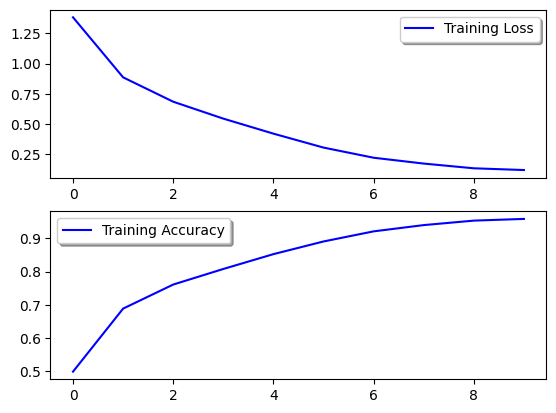

In [34]:
fig, ax = plt.subplots(2,1)
ax[0].plot(H.history['loss'],color = 'b',label = 'Training Loss')
legend = ax[0].legend(loc = 'best',shadow = True)

ax[1].plot(H.history['accuracy'],color = 'b',label = 'Training Accuracy')
legend = ax[1].legend(loc = 'best',shadow = True)



In [35]:
test_loss , test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4067 - accuracy: 0.7324


In [36]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred,axis = 1)

y_true = np.argmax(y_test,axis = 1)

confusion_mtx = tf.math.confusion_matrix(y_true,y_pred_classes)

313/313 [==============================] - 1s 4ms/step


AttributeError: Axes.set() got an unexpected keyword argument 'xsticklabels'

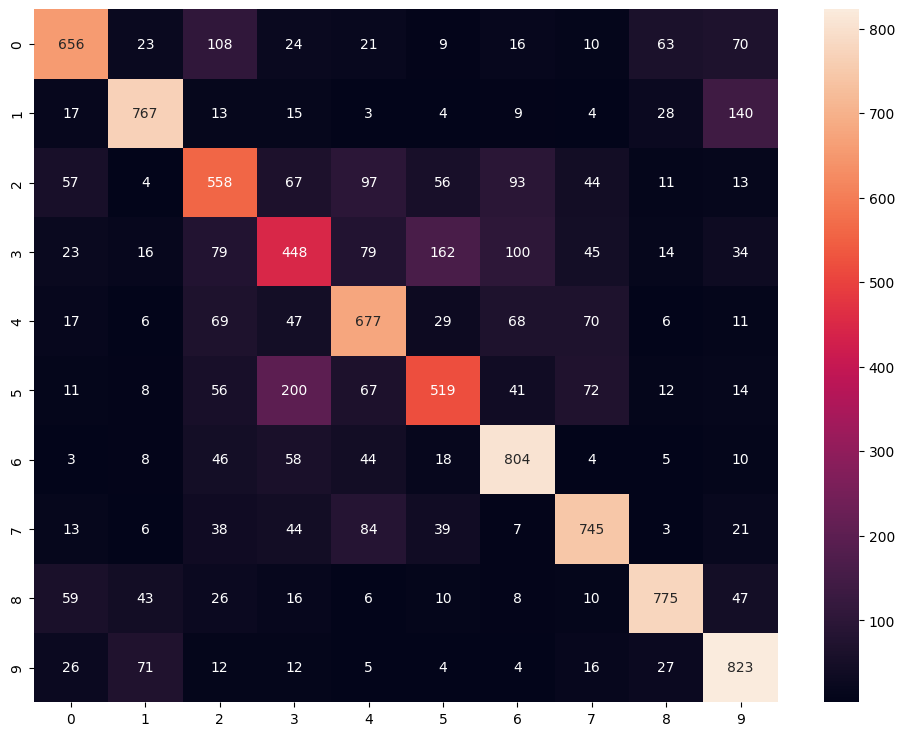

In [29]:
import seaborn as sns
plt.figure(figsize=(12,9))
c = sns.heatmap(confusion_mtx,annot = True, fmt = 'g')
c.set(xsticklabels = classesName,ysticklabels = classesName)